# 1. Introduction

# 2. Network Characteristics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx
from networkx.algorithms import community
import random

from operator import itemgetter
import collections
import itertools



# import warnings
# warnings.filterwarnings("ignore")

**Load File**

In [3]:
file = "email-dnc.edges"

In [4]:
with open(file) as file_object:
    lines = file_object.read()
lines = lines.split("\n")
lines = lines[1:]
edges_list = [(x[0], x[1]) for x in [x.split(",") for x in lines]]

In [5]:
# Initialize Graph
G = nx.DiGraph()

# Add edges
G.add_edges_from(edges_list)

**Charactersitics**

In [17]:
# Number of Nodes 
G_nodes = G.number_of_nodes()
print("Nodes: {}".format(G_nodes))

# Number of edges
G_edges = G.number_of_edges()
print("Edges: {}".format(G_edges))

# Max degree
degrees = [G.degree(n) for n in G.nodes()]
G_max_degree = max(degrees)
print("max_degree: {}".format(G_max_degree))

# Min degree
G_min_degree = min(degrees)
print("min_degree: {}".format(G_min_degree))

# Average degree
G_avg_degree = sum([x[1] for x in list(nx.degree(G))])/nx.number_of_nodes(G)
print("Average Degree: {}".format(G_avg_degree))

# Average Clustering Coefficient 
G_averageClustering =  nx.average_clustering(G)
print("averageClustering: {}".format(G_averageClustering))

# Transitivity
G_transitivity = nx.transitivity(G)
print("Tranistivity: {}".format(G_transitivity))


# closeness centrality of kite Graph
closeness_centrality = nx.closeness_centrality(G)
max_closeness = max(closeness_centrality.items(), key =itemgetter(1))
print("max_closeness: {}".format(max_closeness))

# Betweeness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
max_betweenness = max(betweenness_centrality.items(), key =itemgetter(1))
print("max_betweenness: {}".format(max_betweenness))

# Degree Centrality
degree_centrality = nx.degree_centrality(G)
max_degree_centrality = max(degree_centrality.items(), key = itemgetter(1))
print("max_degree_centrality: {}".format(max_degree_centrality))

# eigenvector_centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
max_eigenvector_centrality = max(eigenvector_centrality.items(), key = itemgetter(1))
print("max_eigenvector_centrality: {}".format(max_eigenvector_centrality))

Nodes: 1891
Edges: 5598
max_degree: 580
min_degree: 1
Average Degree: 5.920676890534109
averageClustering: 0.176958616167228
Tranistivity: 0.07778431155644311
max_closeness: ('1669', 0.2580557072637903)
max_betweenness: ('1669', 0.12887116023101908)
max_degree_centrality: ('1874', 0.3068783068783069)
max_eigenvector_centrality: ('1874', 0.3205937512612431)


In [34]:
# Network connection: True/False
#G_connected = nx.is_connected(G)
#print("It's connected: {}".format(G_connected))

# Average Shortest path  
#G_avg_shortest_path = nx.average_shortest_path_length(G)
#print("Average Shortest path: {}".format(G_avg_shortest_path))
# The graph is not connected


# Network Triangles
#G_triangles = sum(nx.triangles(G).values())
#print("Triangles: {}".format(G_triangles))

**Degree Distribution**

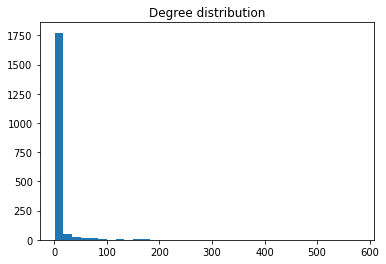

In [25]:
degree_distribution2 = [G.degree(n) for n in G.nodes()]
plt.hist(degree_distribution2, bins = 35)
plt.title("Degree distribution")
plt.show()

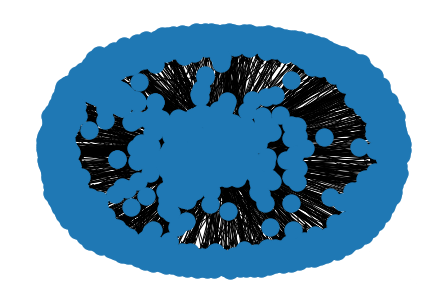

In [26]:
nx.draw(G)

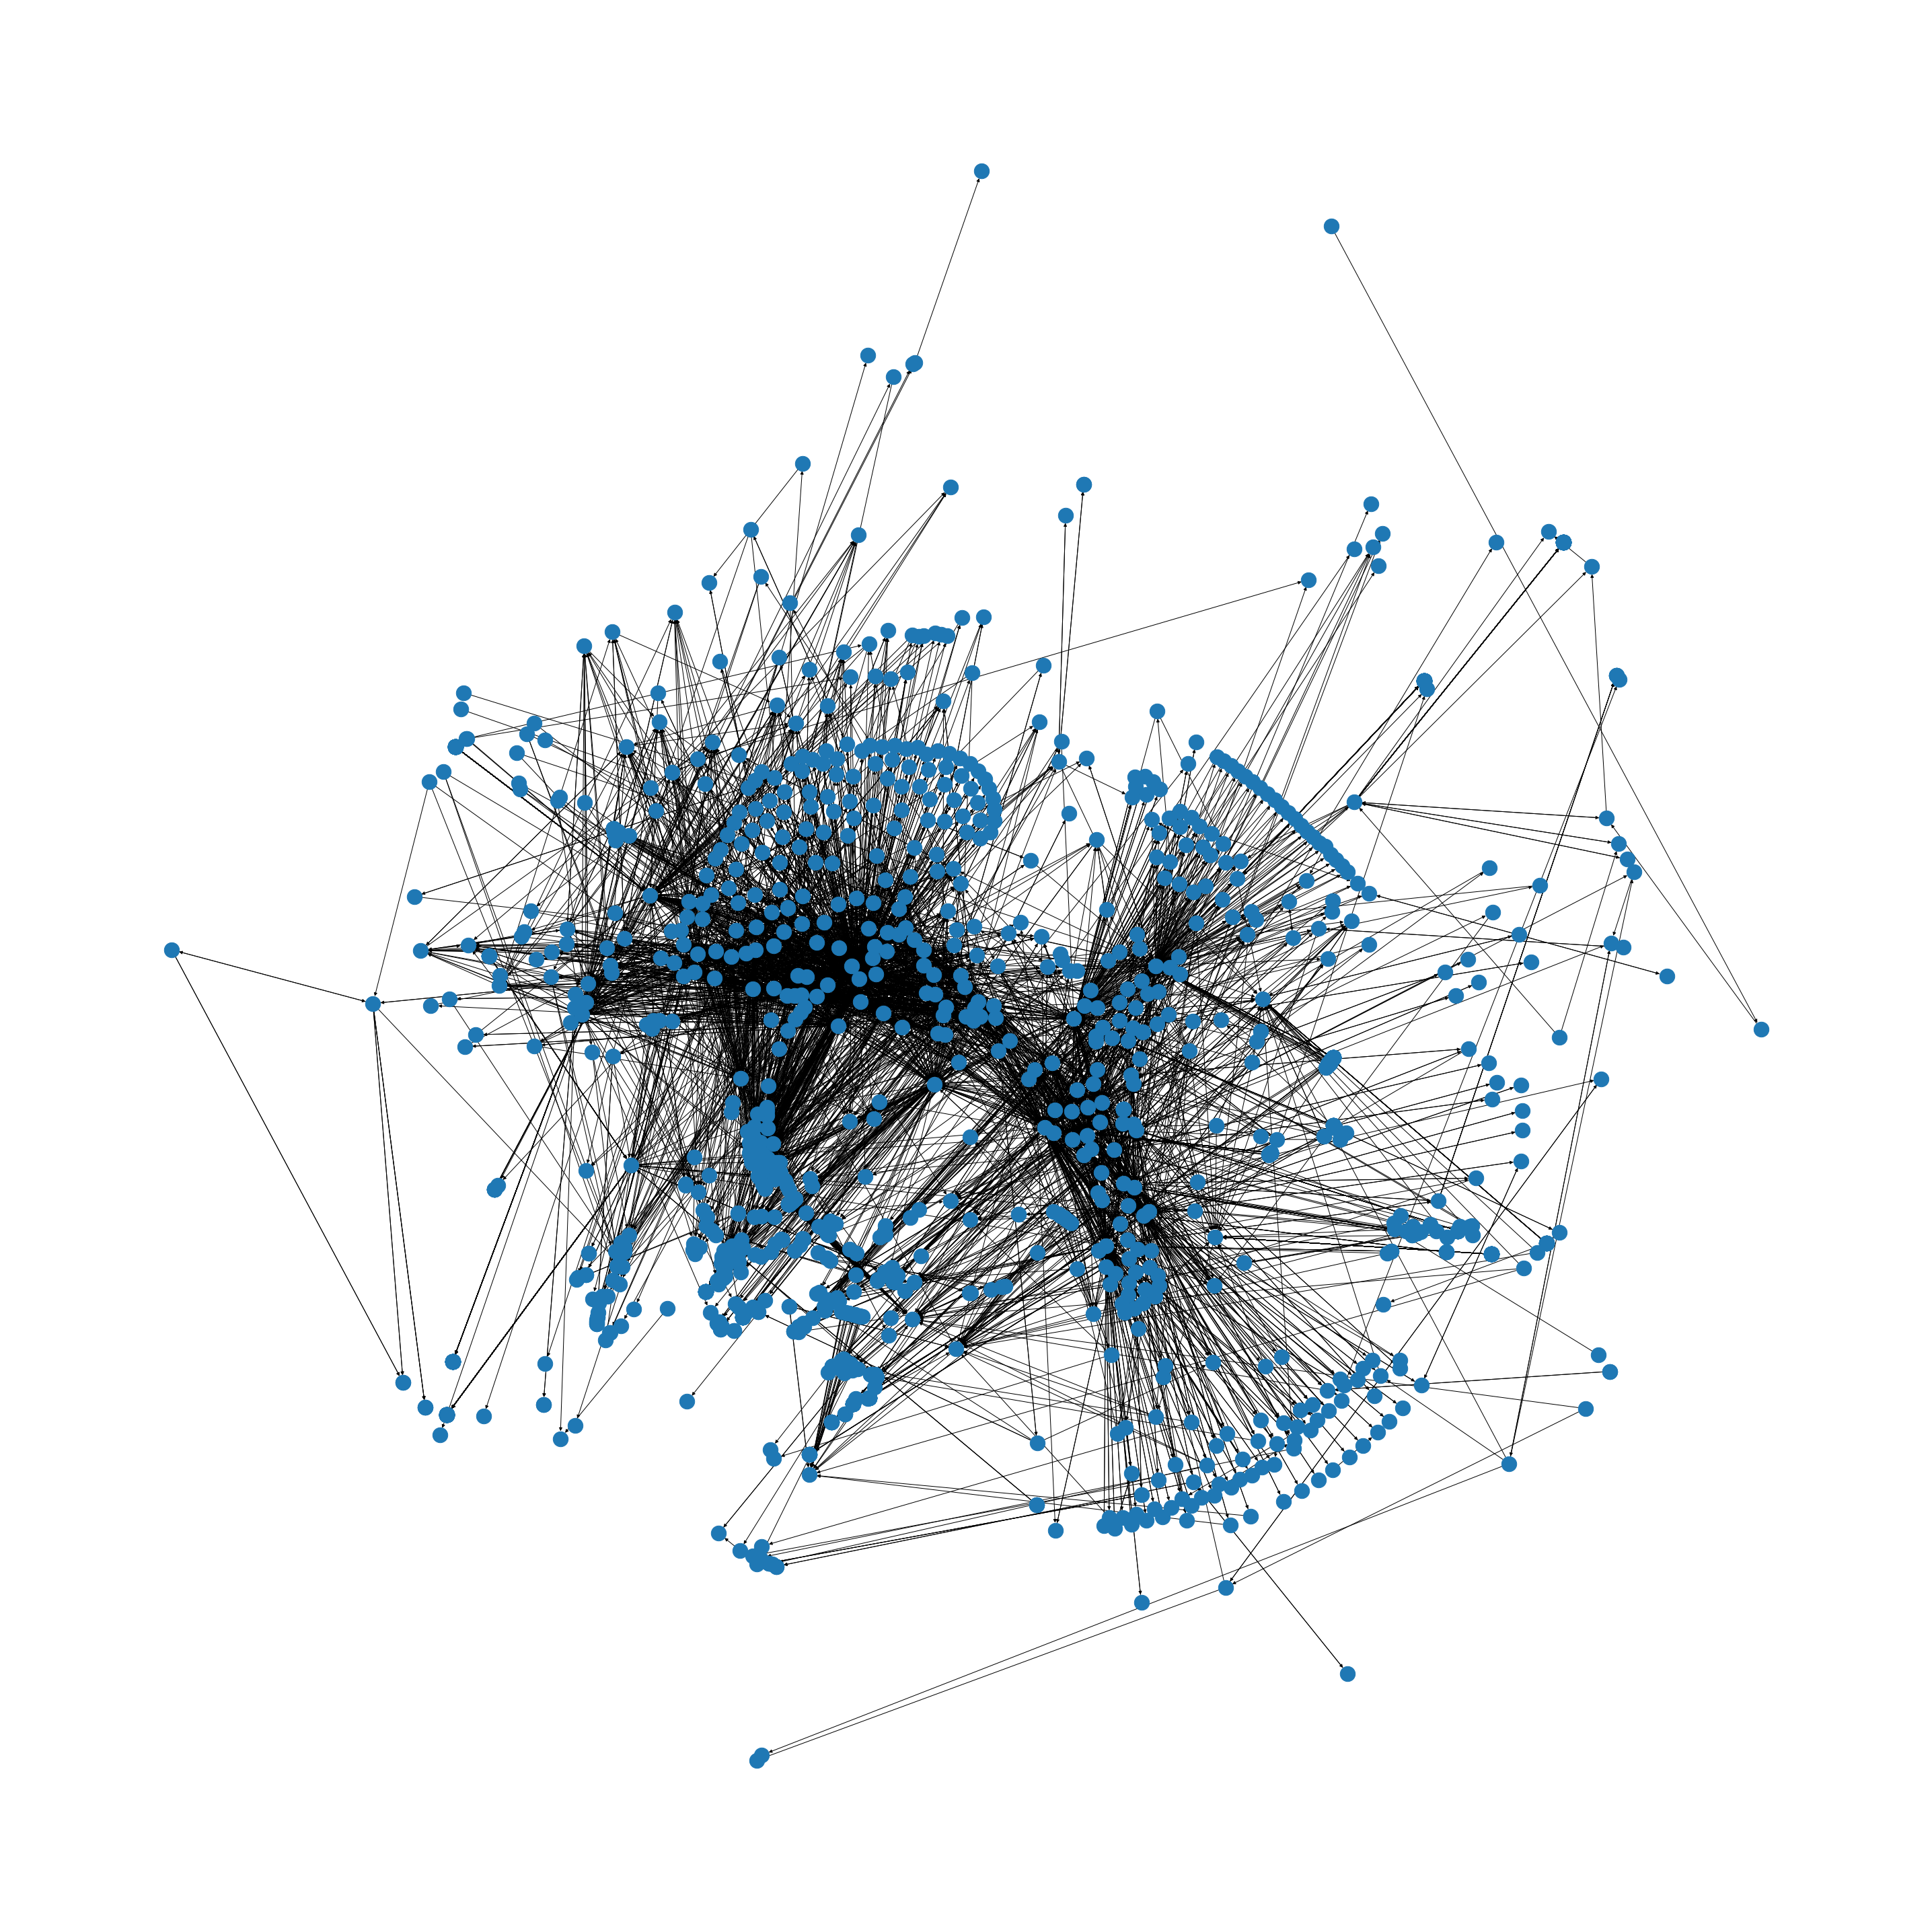

In [36]:
#Figure
plt.figure(figsize=(40,40))

#Layout
pos = nx.kamada_kawai_layout(G)



#Drawing in plt using nx
#nx.draw_networkx_labels(G, pos = pos, font_size = 10, font_family = 'sans-serif', font_color='black')
nx.draw_networkx_edges(G,pos = pos, alpha=0.005, width=0.1)
nx.draw(G, pos = pos, with_labels = False, node_size =500)
plt.axis('off')
plt.savefig('Eemail_DNC_Network.png')
plt.tight_layout()

## Models of Networks

dentify the most appropriate model for the chosen network:

1. If the network can be model a Random Network, obtain the corresponding parameters (p). Make a comparison of with the corresponding expected values.

2. If the network is a Scale-Free Network, obtain its degree exponent 𝛾.

Include any observation that you consider important based on the T3. Models of Networks.

Using Random Network Model: Erdos-Renyi.

Density of the network = P

In [11]:
p = nx.density(G)
nodes = nx.number_of_nodes(G)
print("Nodes: {}".format(nodes))
print("P:     {}".format(p))

Nodes: 1891
P:     0.0015663166377074362


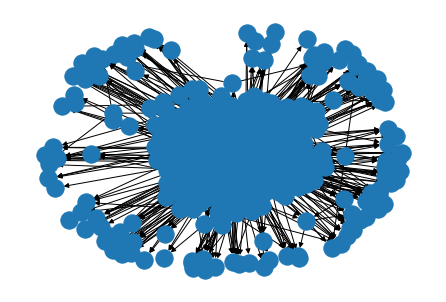

In [18]:
G_erdos = nx.erdos_renyi_graph(nodes, p, seed = None, directed = True)
nx.draw(G_erdos)
plt.savefig('Simulate_network.png')

**Network vs Expected Network Metrics**

In [16]:
# Number of Nodes 
G_nodes_erdos = G_erdos.number_of_nodes()
print("Nodes: {}".format(G_nodes_erdos))

# Number of edges
G_edges_erdos = G_erdos.number_of_edges()
print("Edges: {}".format(G_edges_erdos))

# Max degree
degrees_erdos = [G_erdos.degree(n) for n in G_erdos.nodes()]
G_max_degree_erdos = max(degrees_erdos)
print("max_degree: {}".format(G_max_degree_erdos))

# Min degree
G_min_degree_erdos = min(degrees_erdos)
print("min_degree: {}".format(G_min_degree_erdos))

# Average degree
G_avg_degree_erdos = sum([x[1] for x in list(nx.degree(G_erdos))])/nx.number_of_nodes(G_erdos)
print("Average Degree: {}".format(G_avg_degree_erdos))

# Average Clustering Coefficient 
G_averageClustering_erdos =  nx.average_clustering(G_erdos)
print("averageClustering: {}".format(G_averageClustering_erdos))

# Transitivity
G_transitivity_erdos = nx.transitivity(G_erdos)
print("Tranistivity: {}".format(G_transitivity_erdos))


# closeness centrality of kite Graph
closeness_centrality_erdos = nx.closeness_centrality(G_erdos)
max_closeness_erdos = max(closeness_centrality_erdos.items(), key =itemgetter(1))
print("max_closeness: {}".format(max_closeness_erdos))

# Betweeness Centrality
betweenness_centrality_erdos = nx.betweenness_centrality(G_erdos)
max_betweenness_erdos = max(betweenness_centrality_erdos.items(), key =itemgetter(1))
print("max_betweenness: {}".format(max_betweenness_erdos))

# Degree Centrality
degree_centrality_erdos = nx.degree_centrality(G_erdos)
max_degree_centrality_erdos = max(degree_centrality_erdos.items(), key = itemgetter(1))
print("max_degree_centrality: {}".format(max_degree_centrality_erdos))

# eigenvector_centrality
eigenvector_centrality_erdos = nx.eigenvector_centrality(G_erdos)
max_eigenvector_centrality_erdos = max(eigenvector_centrality_erdos.items(), key = itemgetter(1))
print("max_eigenvector_centrality: {}".format(max_eigenvector_centrality_erdos))

Nodes: 1891
Edges: 5614
max_degree: 16
min_degree: 0
Average Degree: 5.937599153886833
averageClustering: 0.0009098098270493827
Tranistivity: 0.0009401809848395816
max_closeness: (1192, 0.17470879235460135)
max_betweenness: (1388, 0.025586452712629233)
max_degree_centrality: (1388, 0.008465608465608466)
max_eigenvector_centrality: (1192, 0.08280465863206145)


**Benckmarking**

In [25]:
# Comparative table
real = [G_nodes, G_edges, G_max_degree, G_min_degree, G_avg_degree, G_averageClustering, G_transitivity, max_closeness[1], max_betweenness[1], max_degree_centrality[1], max_eigenvector_centrality[1]]
expected = [G_nodes_erdos, G_edges_erdos, G_max_degree_erdos, G_min_degree_erdos, G_avg_degree_erdos, G_averageClustering_erdos, G_transitivity_erdos, max_closeness_erdos[1], max_betweenness_erdos[1], max_degree_centrality_erdos[1], max_eigenvector_centrality_erdos[1]]

index = ["Nodes", "Edges", "Max_degree","Min_degree", "avg_degree", "avg_clustering", "Transitivity", "Max_closenness", "Max_betweennes", "Max_degree_centrality", "Max_eigenvector_centrality"]
data = zip(real, expected)
columns = ["Real", "Expected"]

df = pd.DataFrame(data = data, columns = columns, index = index).T
df.T

Real     Expected
Nodes                       1891.000000  1891.000000
Edges                       5598.000000  5614.000000
Max_degree                   580.000000    16.000000
Min_degree                     1.000000     0.000000
avg_degree                     5.920677     5.937599
avg_clustering                 0.176959     0.000910
Transitivity                   0.077784     0.000940
Max_closenness                 0.258056     0.174709
Max_betweennes                 0.128871     0.025586
Max_degree_centrality          0.306878     0.008466
Max_eigenvector_centrality     0.320594     0.082805

## Community Detection

In [7]:
# Dirgraph to undirected
G1 = G.to_undirected()

In [73]:
greedy_communities = nx.community.greedy_modularity_communities(G1)
print("Total Communities: {}".format(len(greedy_communities)))

Total Communities: 57


**Trying to get the modularity of all the communities in order to select a representative one**

In [ ]:
# Girvan–Newman algorithm using the community.girvan_newman() function of NetworkX
list_communities = list(nx.algorithms.community.girvan_newman(G1))

In [ ]:
# format list of lists
communitites_final = []
for element in list_communities:
    list_set = list(element)
    list_list =[list(c) for c in list_set]
    communitites_final.append(list_list)

In [ ]:
# Modularity of each cluster
list_clusters = [] 
list_modularity = []
highest_modularity = []

for i in range(len(communitites_final)):
    cluster_modularity = nx.algorithms.community.modularity(G1, communitites_final[i]) 
    clusters = len(communitites_final[i])
    list_modularity.append(cluster_modularity)
    list_clusters.append(clusters)
    
    # Community and modularity
    highest_modularity.append((communitites_final[i], cluster_modularity))


max_mod = max(highest_modularity, key = itemgetter(1))
max_modularity = max_mod[1]
max_community = max_mod[0]

print("Maximum Modularity: {}\n".format(max_modularity))
print("Communities:\n {}".format(max_community))

In [ ]:
# Moduarity of all communites
data = zip(list_clusters,list_modularity)
columns = ["Cluster", "Modularity"]
df = pd.DataFrame(data = data, columns = columns)

def highlight_max(s):

    is_max = s == s.max()
    return ['font-weight: bold' if x else '' for x in is_max]

df_style = df.style.apply(highlight_max)
df_style

**Solution of the problem of running out memory**

It was inspected manually given the len of their communities, it can be noticed that there are 6 representative communities, the other ones only have a few elements or only 1. Therefore, those communities were put together to avoid the problem "running out memory"

In [110]:
len_communities = [len(x) for x in greedy_communities]
print(len_communities)
print(len(len_communities))

[442, 367, 323, 276, 226, 107, 38, 20, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
57


In [109]:
# Other Community
c_7_otros = [item for sublist in greedy_communities[6:] for item in sublist]

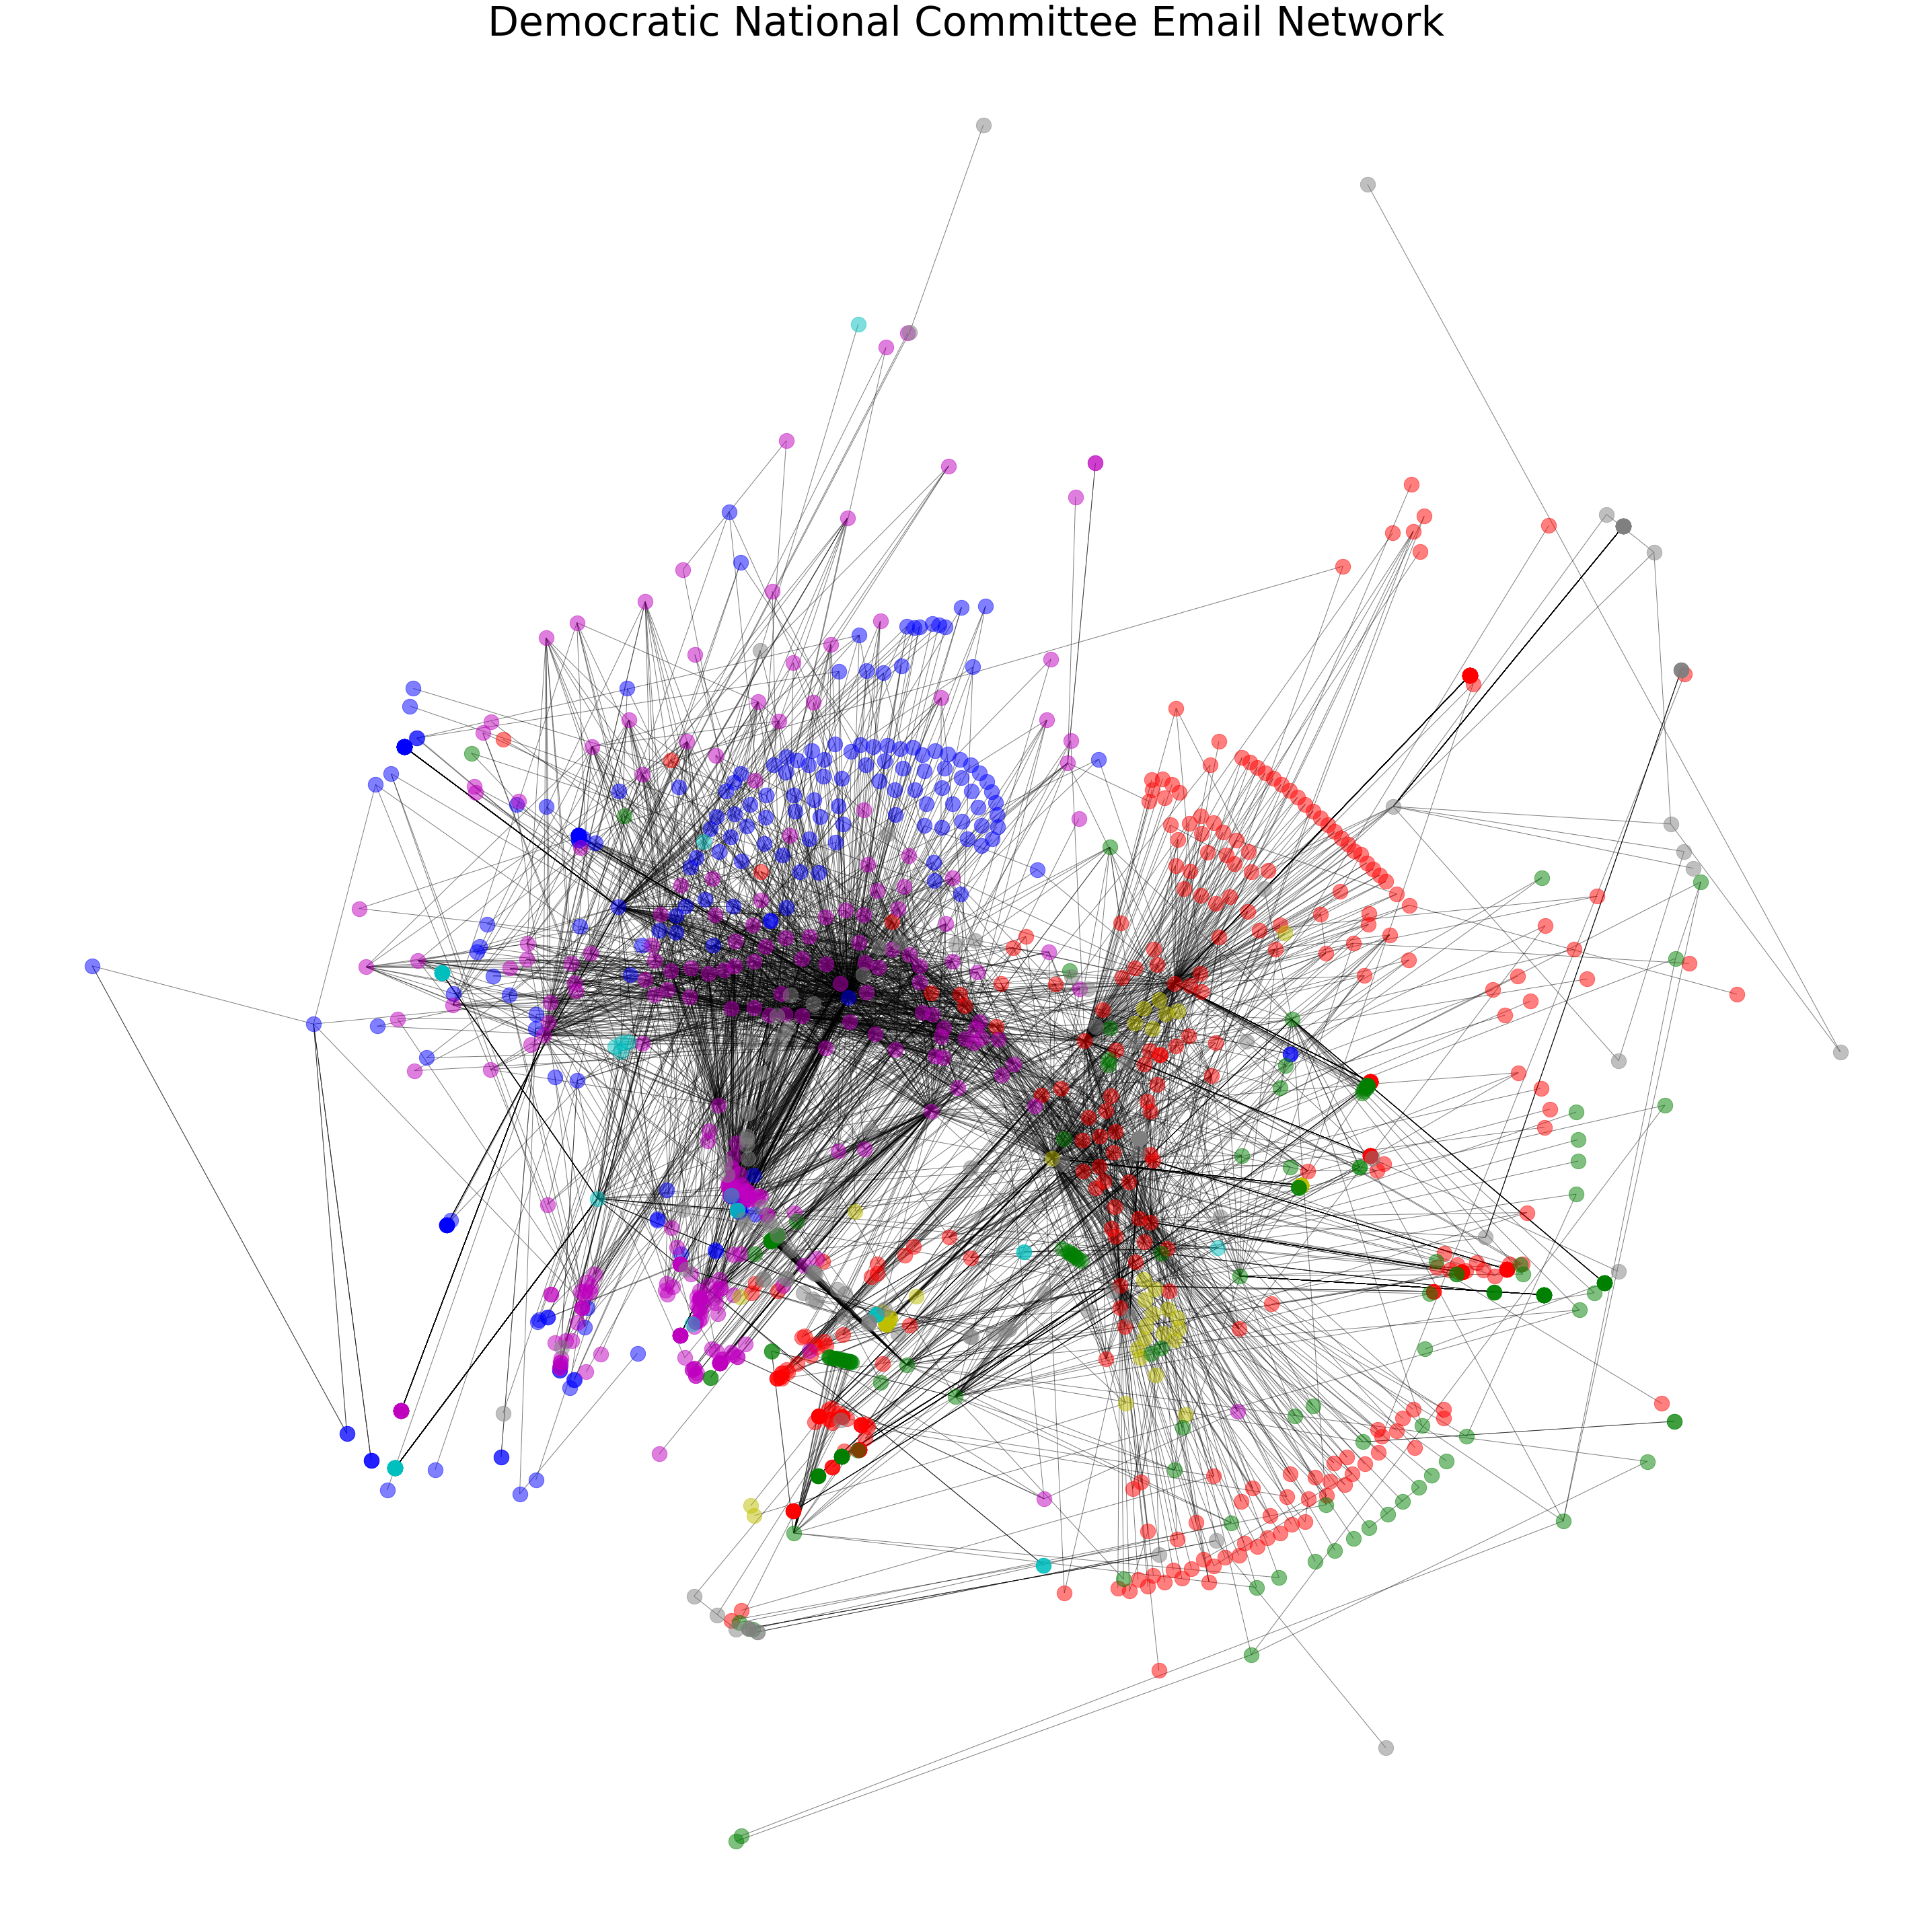

In [111]:
###### Greedy Communities ###### 
pos = nx.kamada_kawai_layout(G)

# Settings
plt.figure(figsize=(40,40))

# Community 1
nx.draw_networkx_nodes(G1,pos,
                       nodelist=greedy_communities[0],
                       node_color='r',
                       node_size = 500,
                       alpha = 0.5)

# Community 2
nx.draw_networkx_nodes(G1,pos,
                       nodelist=greedy_communities[1],
                       node_color='b',
                       node_size = 500,
                       alpha = 0.5)

# Community 3
nx.draw_networkx_nodes(G1,pos,
                       nodelist=greedy_communities[2],
                       node_color='m',
                       node_size = 500,
                       alpha = 0.5)

# Community 4
nx.draw_networkx_nodes(G1,pos,
                       nodelist=greedy_communities[3],
                       node_color='y',
                       node_size = 500,
                       alpha = 0.5)

# Community 5
nx.draw_networkx_nodes(G1,pos,
                       nodelist=greedy_communities[4],
                       node_color = 'g',
                       node_size = 500,
                       alpha = 0.5)

# Community 6
nx.draw_networkx_nodes(G1,pos,
                       nodelist = greedy_communities[5],
                       node_color = 'c',
                       node_size = 500,
                       alpha = 0.5)

# Community 7 (others)
nx.draw_networkx_nodes(G1,pos,
                       nodelist = c_7_otros,
                       node_color = 'gray',
                       node_size = 500,
                       alpha = 0.5)

nx.draw_networkx_edges(G1, pos, alpha  =0.5)
#nx.draw_networkx_labels(G, pos, font_color = "white")
plt.axis("off")

plt.title('Democratic National Committee Email Network', fontsize = 60)
plt.savefig('Democratic National Committee Email Network.png', facecolor='w', edgecolor='w')
plt.tight_layout()
plt.show()